📒 [NB 4-1] 상관관계 분석 및 히트맵(Heatmap)
1. 환경 설정 및 패키지 설치
상관분석은 변수 간의 선형적 관계를 파악하는 기법이다. 시각화를 위해 seaborn을 주로 사용한다.

In [1]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("라이브러리 로드 완료.")

라이브러리 로드 완료.


2. 대사증후군 관련 데이터 생성
서로 연관성이 높은 임상 변수들(BMI, 혈당, 콜레스테롤, 중성지방)을 생성한다. 상관관계를 인위적으로 부여하기 위해 공분산을 설정한다.

In [2]:
np.random.seed(42)
n = 200

# 1. BMI 생성 (평균 25, 표준편차 4)
bmi = np.random.normal(25, 4, n)

# 2. BMI와 양의 상관관계를 갖도록 다른 변수 생성
# BMI가 높으면 혈당, 중성지방도 높아지는 경향 반영
glucose = 80 + (bmi * 1.5) + np.random.normal(0, 10, n)     # 혈당
triglyceride = 100 + (bmi * 2.0) + np.random.normal(0, 20, n) # 중성지방
cholesterol = 150 + (bmi * 1.2) + np.random.normal(0, 15, n)  # 콜레스테롤
# 나이는 BMI와 관계없는 랜덤 변수로 생성 (상관관계가 낮아야 함)
age = np.random.randint(20, 80, n)

df = pd.DataFrame({
    'Age': age,
    'BMI': bmi,
    'Glucose': glucose,
    'Triglyceride': triglyceride,
    'Cholesterol': cholesterol
})

print("데이터 미리보기:")
display(df.head())

데이터 미리보기:


,Age,BMI,Glucose,Triglyceride,Cholesterol
0,37,26.986857,124.058159,122.085160,193.739057
1,78,24.446943,122.278259,136.906385,165.503851
2,61,27.590754,132.216644,155.286382,196.152994
3,58,31.092119,137.176200,163.123851,207.645111
4,36,24.063387,102.318386,139.125464,185.077587


3. 산점도 행렬 (Pairplot) 시각화
모든 변수 쌍(Pair)의 관계를 산점도로 한눈에 확인한다.

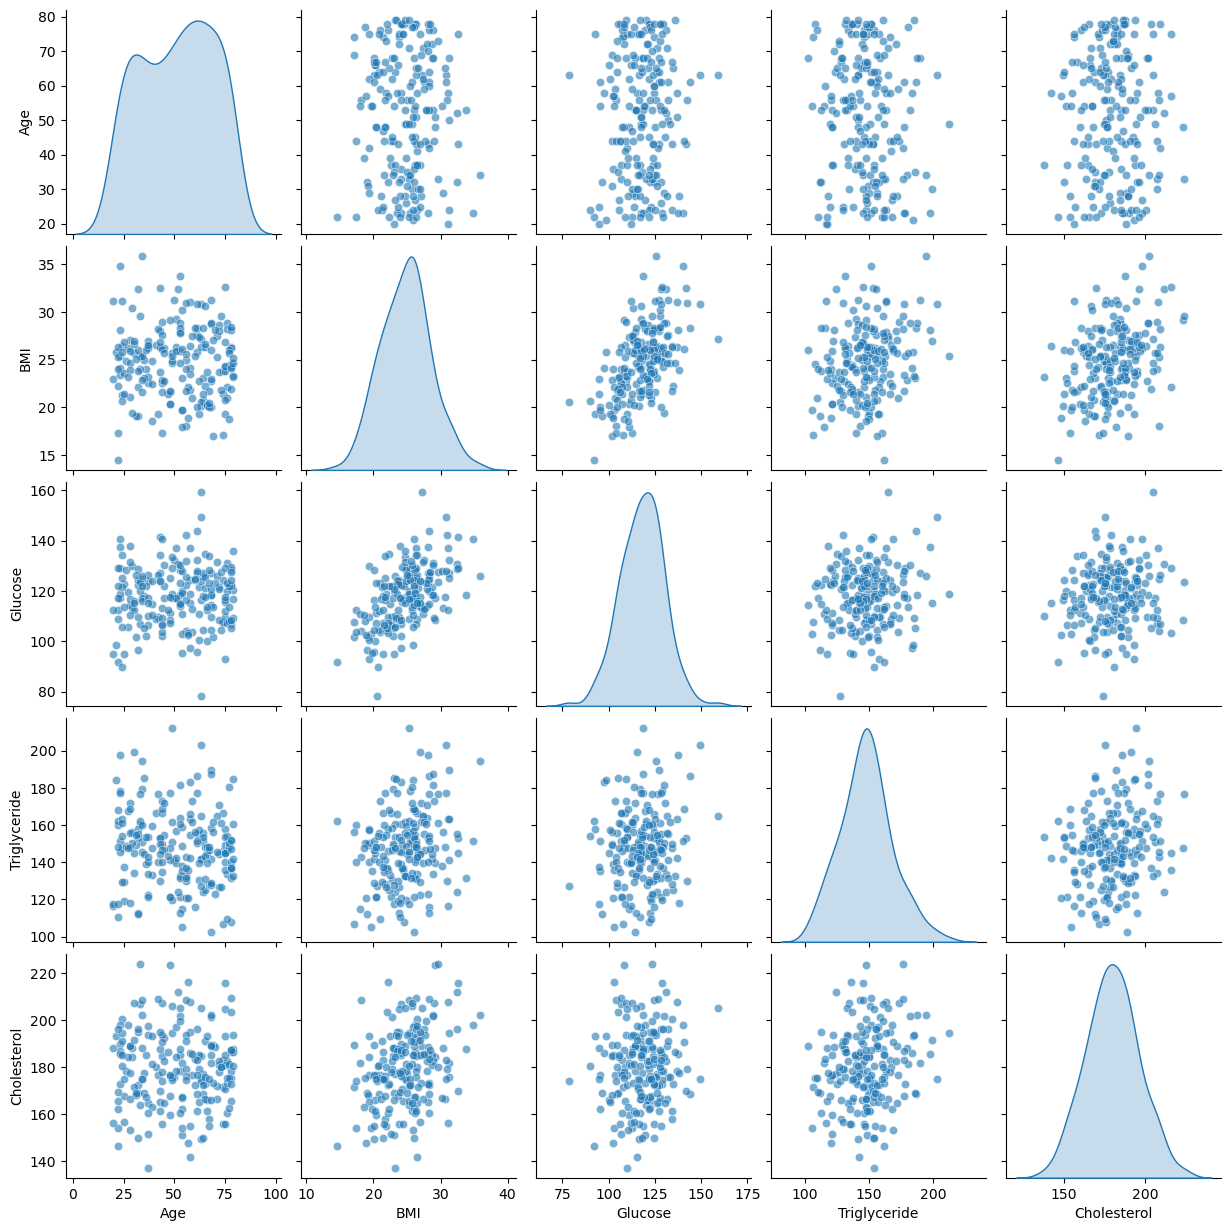

In [3]:
# 대각선은 히스토그램(분포), 나머지는 산점도(관계)
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

# 해석: BMI, Glucose, Triglyceride 간에는 우상향하는(양의) 패턴이 보인다.

4. 피어슨 상관계수 계산 및 히트맵 그리기
숫자로 된 상관계수 행렬을 구하고, 이를 색상으로 표현한다.

상관계수 행렬 (Correlation Matrix):


,Age,BMI,Glucose,Triglyceride,Cholesterol
Age,1.00,-0.03,0.05,-0.11,0.00
BMI,-0.03,1.00,0.55,0.24,0.34
Glucose,0.05,0.55,1.00,0.11,0.10
Triglyceride,-0.11,0.24,0.11,1.00,0.19
Cholesterol,0.00,0.34,0.10,0.19,1.00


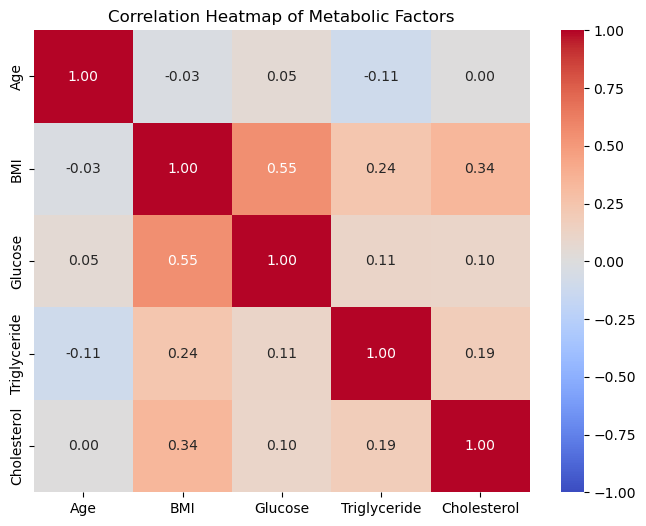

In [4]:
# 1. 상관계수 행렬 계산
corr_matrix = df.corr()

print("상관계수 행렬 (Correlation Matrix):")
display(corr_matrix.round(2))

# 2. 히트맵 시각화
plt.figure(figsize=(8, 6))
# annot=True: 칸 안에 숫자 표시, cmap='Coolwarm': 양수는 붉은색, 음수는 푸른색
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metabolic Factors')
plt.show()

5. 결과 해석

강한 양의 상관관계: BMI와 Triglyceride(r≈0.8) BMI와 , Glucose(r≈0.8)는 강한 붉은색을 띤다. 즉, 비만도가 높을수록 혈당과 중성지방 수치가 높다.
상관관계 없음: Age와 다른 변수들은 0에 가까운 색을 띤다. 이 데이터셋에서 나이는 대사 지표와 관련이 없다.